## logic:
- take a video
- crop the video in images in 10 second gaps
- input images in the transformer and store the captions in a list.
- use a text to audio model.

In [1]:
# !pip install sounddevice
# !pip install PortAudio

In [2]:
import numpy as np
# import sounddevice as sd
import glob
import skimage
from skimage import io
import matplotlib.pyplot as plt

## input image

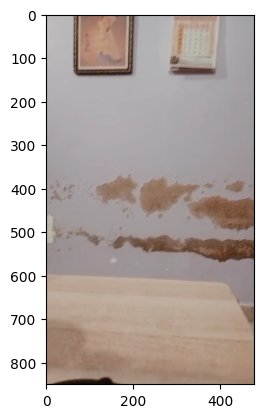

In [3]:

path='/kaggle/input/blind-guidance/1.png'
image=io.imread(path)
i,(im1)=plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

## using transformer model to convert image to text and text to speech

In [4]:
from transformers import pipeline

synthesizer = pipeline("text-to-speech", "suno/bark")

from transformers import pipeline

captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")


2025-07-05 01:12:28.325407: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751677948.559646      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751677948.622187      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [5]:

a= captioner("https://images.ctfassets.net/hrltx12pl8hq/28ECAQiPJZ78hxatLTa7Ts/2f695d869736ae3b0de3e56ceaca3958/free-nature-images.jpg?fit=fill&w=1200&h=630")
i=1
test_image=captioner(f'/kaggle/input/blind-guidance/{i}.png')
test_image
result=[]
for i in range(1,10):
    result.append(captioner(f'/kaggle/input/blind-guidance/{i}.png'))
result

## text to audio

In [ ]:
a
b=a[0]['generated_text']
type(b)
synthesizer(b)
direction= synthesizer("Look I am generating speech in three lines of code!")
print(type(wave_audio),type(dir_value))
dir_value=direction['audio']
from IPython.display import Audio
wave_audio = np.sin(np.linspace(0, 3000, 20000))
Audio(dir_value, rate=20000)


## testing model efficiency on house hold objects

In [14]:

path2='/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.37 AM.jpeg'
image=io.imread(path2)
captioner(path2)

[{'generated_text': 'a red and white bottle sitting on a table'}]

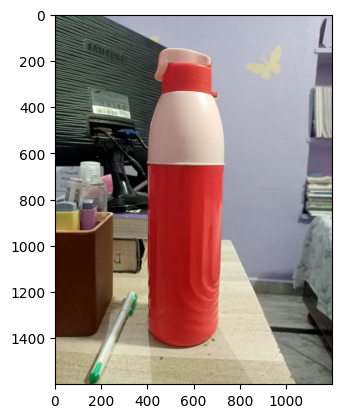

In [15]:
plt.imshow(image)